#### Посчитаем, что для разных базовых активов рисковые метрики различны 

In [105]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#считываем датафреймы 
rts = pd.read_excel('RTS.xlsx')
si = pd.read_excel('Si.xlsx')
gold = pd.read_excel('Gold.xlsx')


Выведем датафреймы 

In [106]:
rts

,SECID,begin,close,end,high,low,open,value,volume
0,RIH0,2018-01-15 00:00:00,124210,2018-01-15 23:59:59,124210,113510,113510,0,2
1,RIH0,2018-02-06 00:00:00,118700,2018-02-06 23:59:59,124760,118700,118710,0,11
2,RIH0,2018-02-07 00:00:00,115960,2018-02-07 23:59:59,124210,115590,124210,0,10
3,RIH0,2018-02-12 00:00:00,110990,2018-02-12 23:59:59,110990,110990,110990,0,1
4,RIH0,2018-02-14 00:00:00,121870,2018-02-14 23:59:59,121870,121870,121870,0,1
...,...,...,...,...,...,...,...,...,...
7078,RIZ6,2025-05-19 00:00:00,112630,2025-05-19 23:59:59,112630,105550,105550,0,2
7079,RIZ6,2025-05-20 00:00:00,110210,2025-05-20 23:59:59,112500,108320,112500,0,5
7080,RIZ6,2025-05-21 00:00:00,109500,2025-05-21 23:59:59,109500,106200,106200,0,2
7081,RIZ6,2025-05-22 00:00:00,106600,2025-05-22 23:59:59,107710,106600,107710,0,2


In [107]:
si

,SECID,begin,close,end,high,low,open,value,volume
0,SiH0,2018-03-14 00:00:00,61700,2018-03-14 23:59:59,61700,61700,61700,0,1
1,SiH0,2018-03-15 00:00:00,61951,2018-03-15 23:59:59,61951,61851,61891,0,4
2,SiH0,2018-03-19 00:00:00,63178,2018-03-19 23:59:59,63178,62852,62852,0,4
3,SiH0,2018-03-20 00:00:00,62523,2018-03-20 23:59:59,62523,62523,62523,0,1
4,SiH0,2018-03-21 00:00:00,62323,2018-03-21 23:59:59,62323,62323,62323,0,1
...,...,...,...,...,...,...,...,...,...
11434,SiZ6,2025-05-22 00:00:00,106436,2025-05-22 19:30:22,106436,106338,106338,0,4
11435,SiZ6,2025-05-23 00:00:00,107886,2025-05-23 23:59:59,107939,106436,106436,0,4
11436,SiZ6,2025-05-26 00:00:00,106999,2025-05-26 23:59:59,107279,105553,107279,0,9
11437,SiZ6,2025-05-27 00:00:00,106115,2025-05-27 23:59:59,106239,106115,106239,0,11


In [108]:
gold

,SECID,begin,close,end,high,low,open,value,volume
0,GDH0,2019-04-01 00:00:00,1332.8,2019-04-01 23:59:59,1332.8,1332.8,1332.8,0,5
1,GDH0,2019-04-05 00:00:00,1321.8,2019-04-05 23:59:59,1334.8,1321.8,1334.8,0,4
2,GDH0,2019-04-08 00:00:00,1333.5,2019-04-08 23:59:59,1346.6,1333.5,1346.6,0,12
3,GDH0,2019-04-10 00:00:00,1350.4,2019-04-10 23:59:59,1350.4,1349.1,1349.1,0,3
4,GDH0,2019-04-15 00:00:00,1326.0,2019-04-15 23:59:59,1326.0,1326.0,1326.0,0,4
...,...,...,...,...,...,...,...,...,...
5822,GDH6,2025-05-26 00:00:00,3421.6,2025-05-26 23:59:59,3454.9,3421.6,3453.9,0,7
5823,GDH6,2025-05-27 00:00:00,3392.0,2025-05-27 23:59:59,3426.2,3391.1,3426.2,0,12
5824,GDH6,2025-05-28 00:00:00,3398.0,2025-05-28 23:59:59,3418.1,3381.3,3418.1,0,9
5825,GDH6,2025-05-29 00:00:00,3423.0,2025-05-29 19:30:22,3423.0,3379.1,3379.1,0,19


Посмотрим на типы фьючерсов, которые у нас есть в выборках 

Далее смотрим на динамику цен закрытия, будем брать ее как основной показатель активности в течение торгового дня 

<Axes: ylabel='close'>

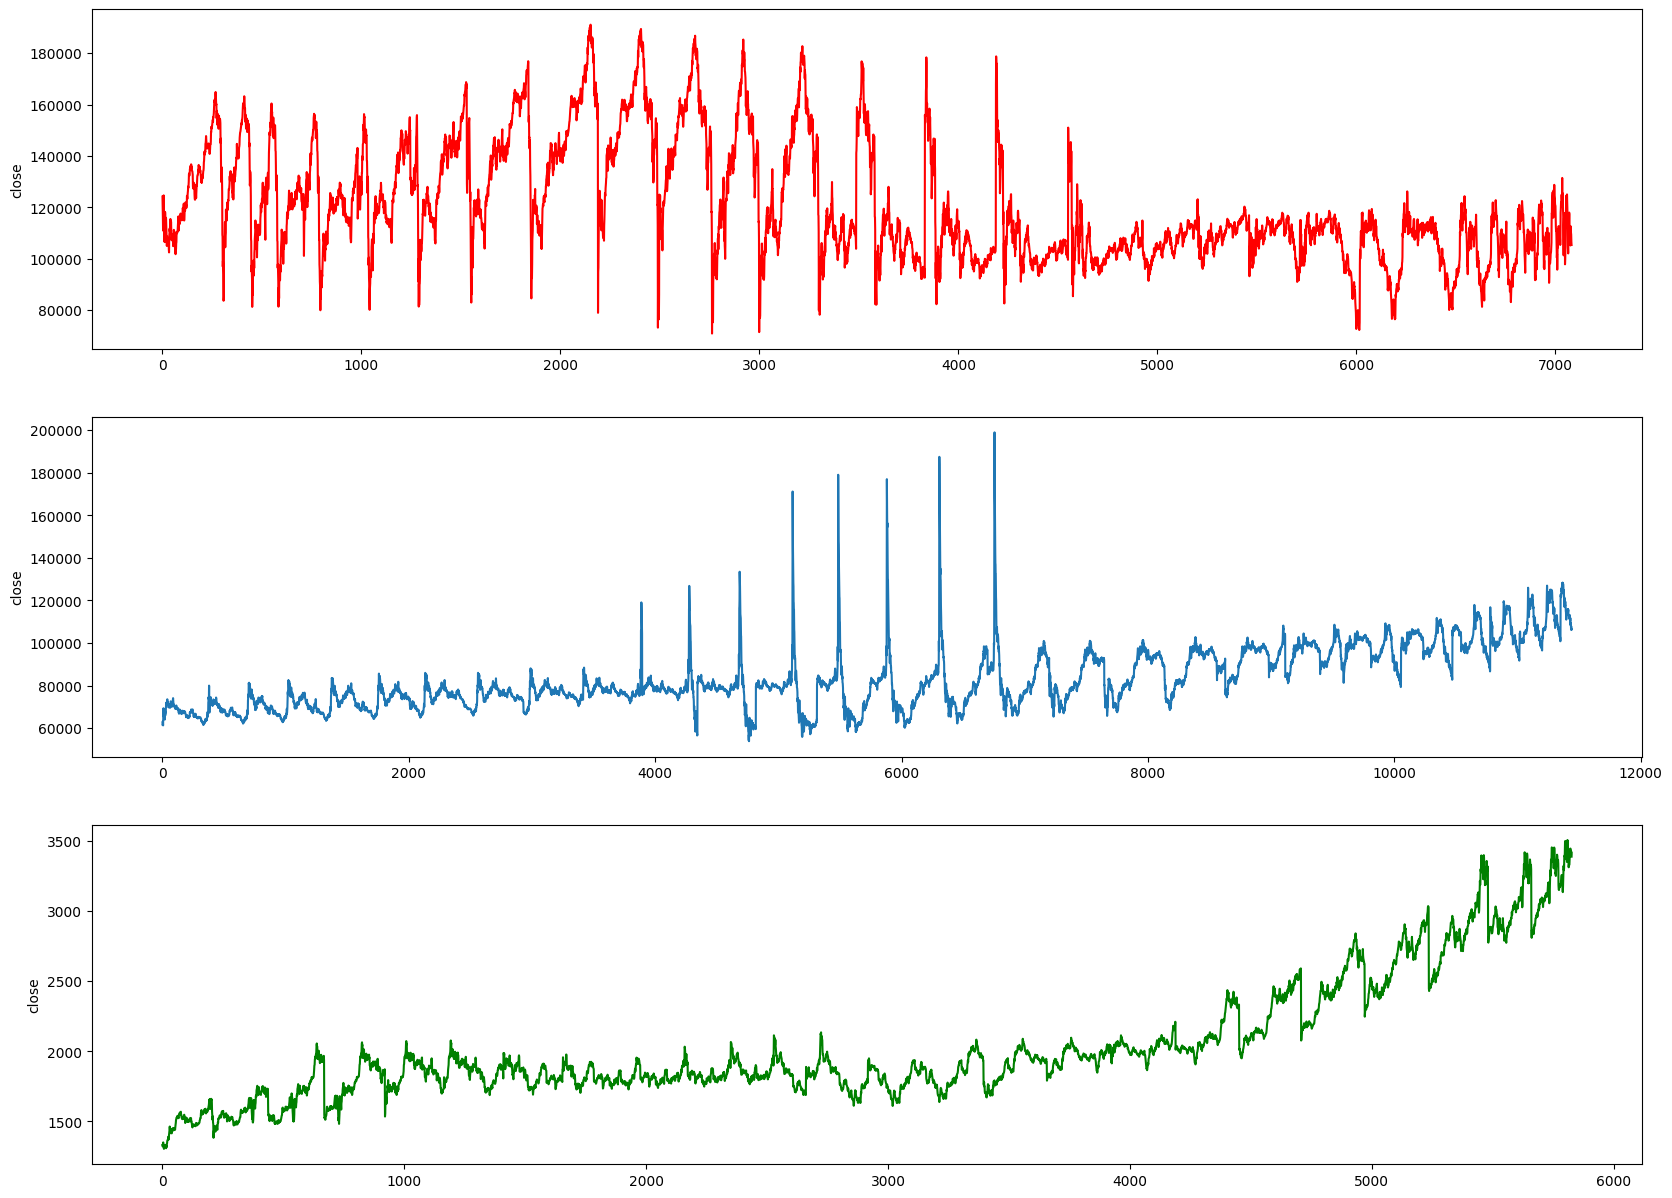

In [111]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
sns.lineplot(rts['close'], ax=ax[0], color='red')
sns.lineplot(si['close'], ax=ax[1])
sns.lineplot(gold['close'], ax=ax[2], color='green')

Посмотрим на процентное изменение цены фьюча для РТС и USD/RUB

<Axes: ylabel='close'>

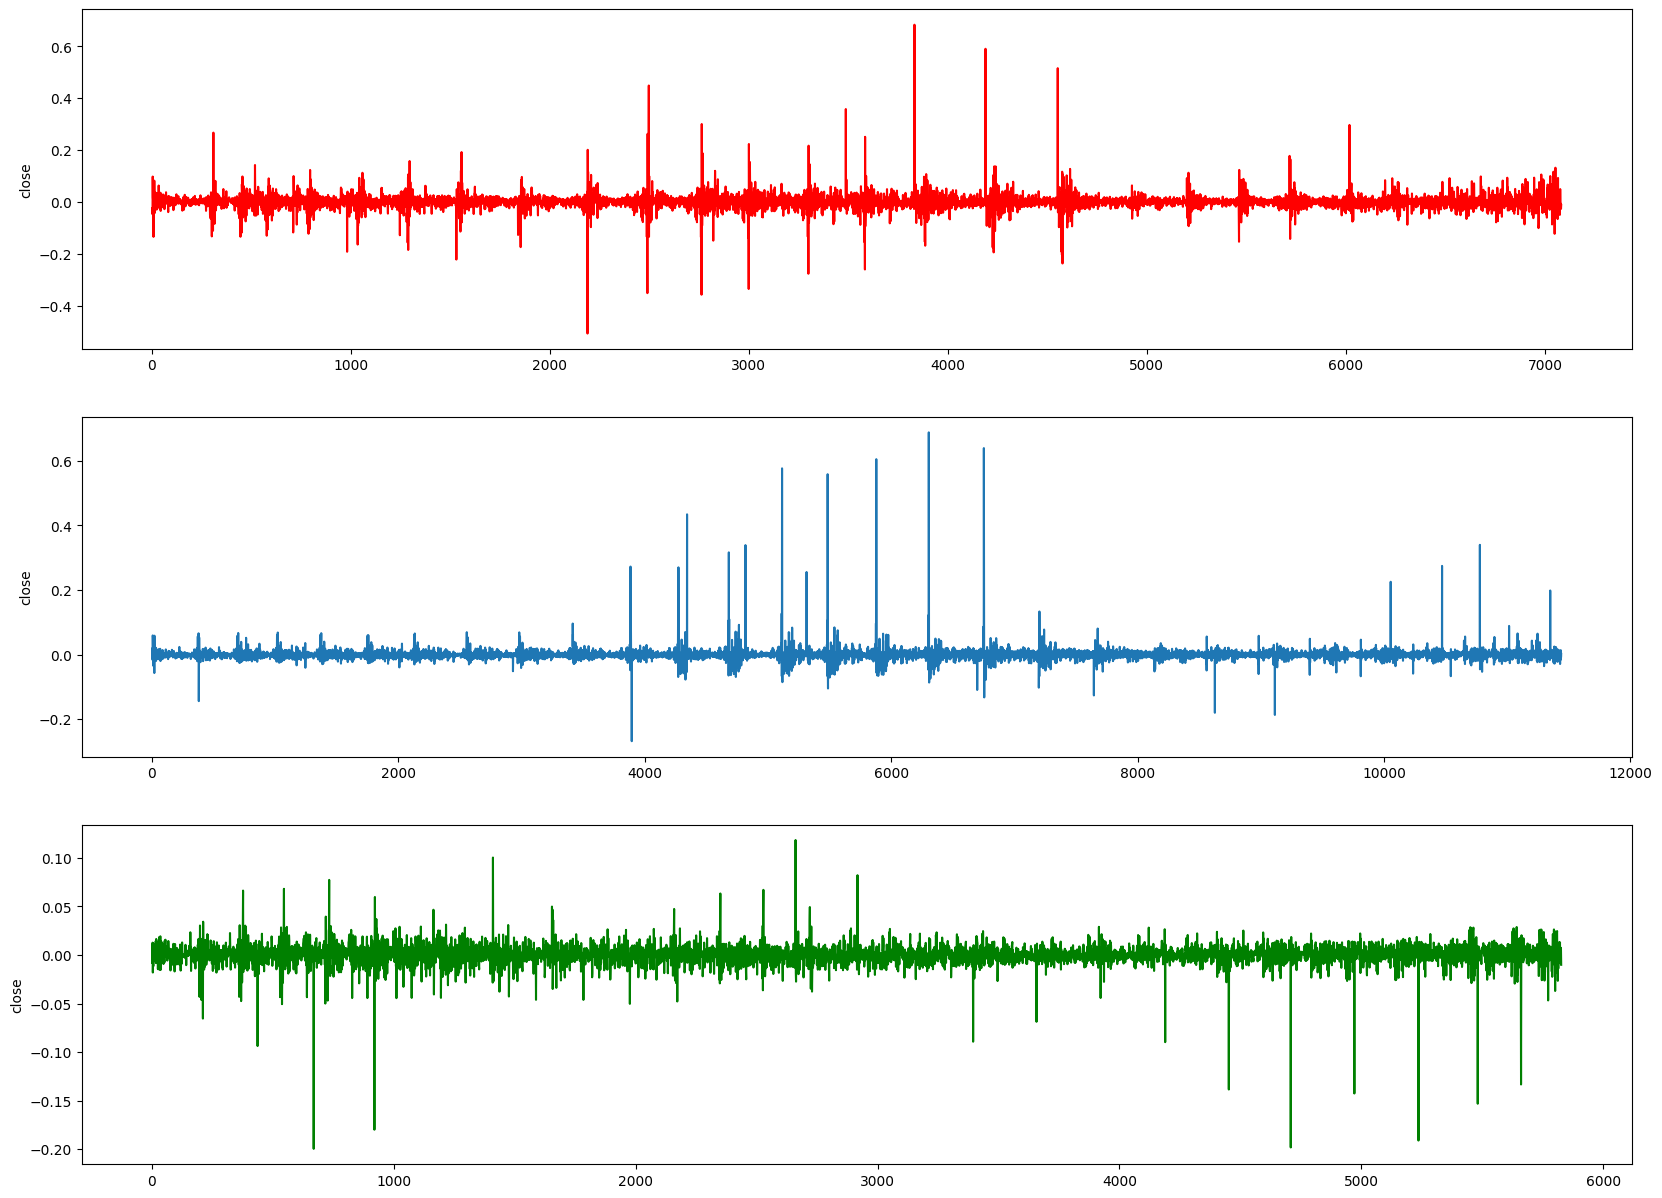

In [112]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
sns.lineplot(rts['close'].pct_change(), ax=ax[0], color='red')
sns.lineplot(si['close'].pct_change(), ax=ax[1])
sns.lineplot(gold['close'].pct_change(), ax=ax[2], color='green')

Возьмем для каждого календарного дня из датасетов контракт с наибольшим объёмом, чтобы получить непрерывный ценовой ряд.

In [113]:
def load_nearest_contract(df):
    df['date'] = pd.to_datetime(df['begin']).dt.date
    df = df.sort_values(['date', 'volume'], ascending=[True, False])
    nearest = df.groupby('date').first().reset_index()
    return nearest.set_index('date')['close']

rts_continuos = load_nearest_contract(rts)
si_continuos = load_nearest_contract(si)
gold_continuos = load_nearest_contract(gold)

<Axes: xlabel='date', ylabel='close'>

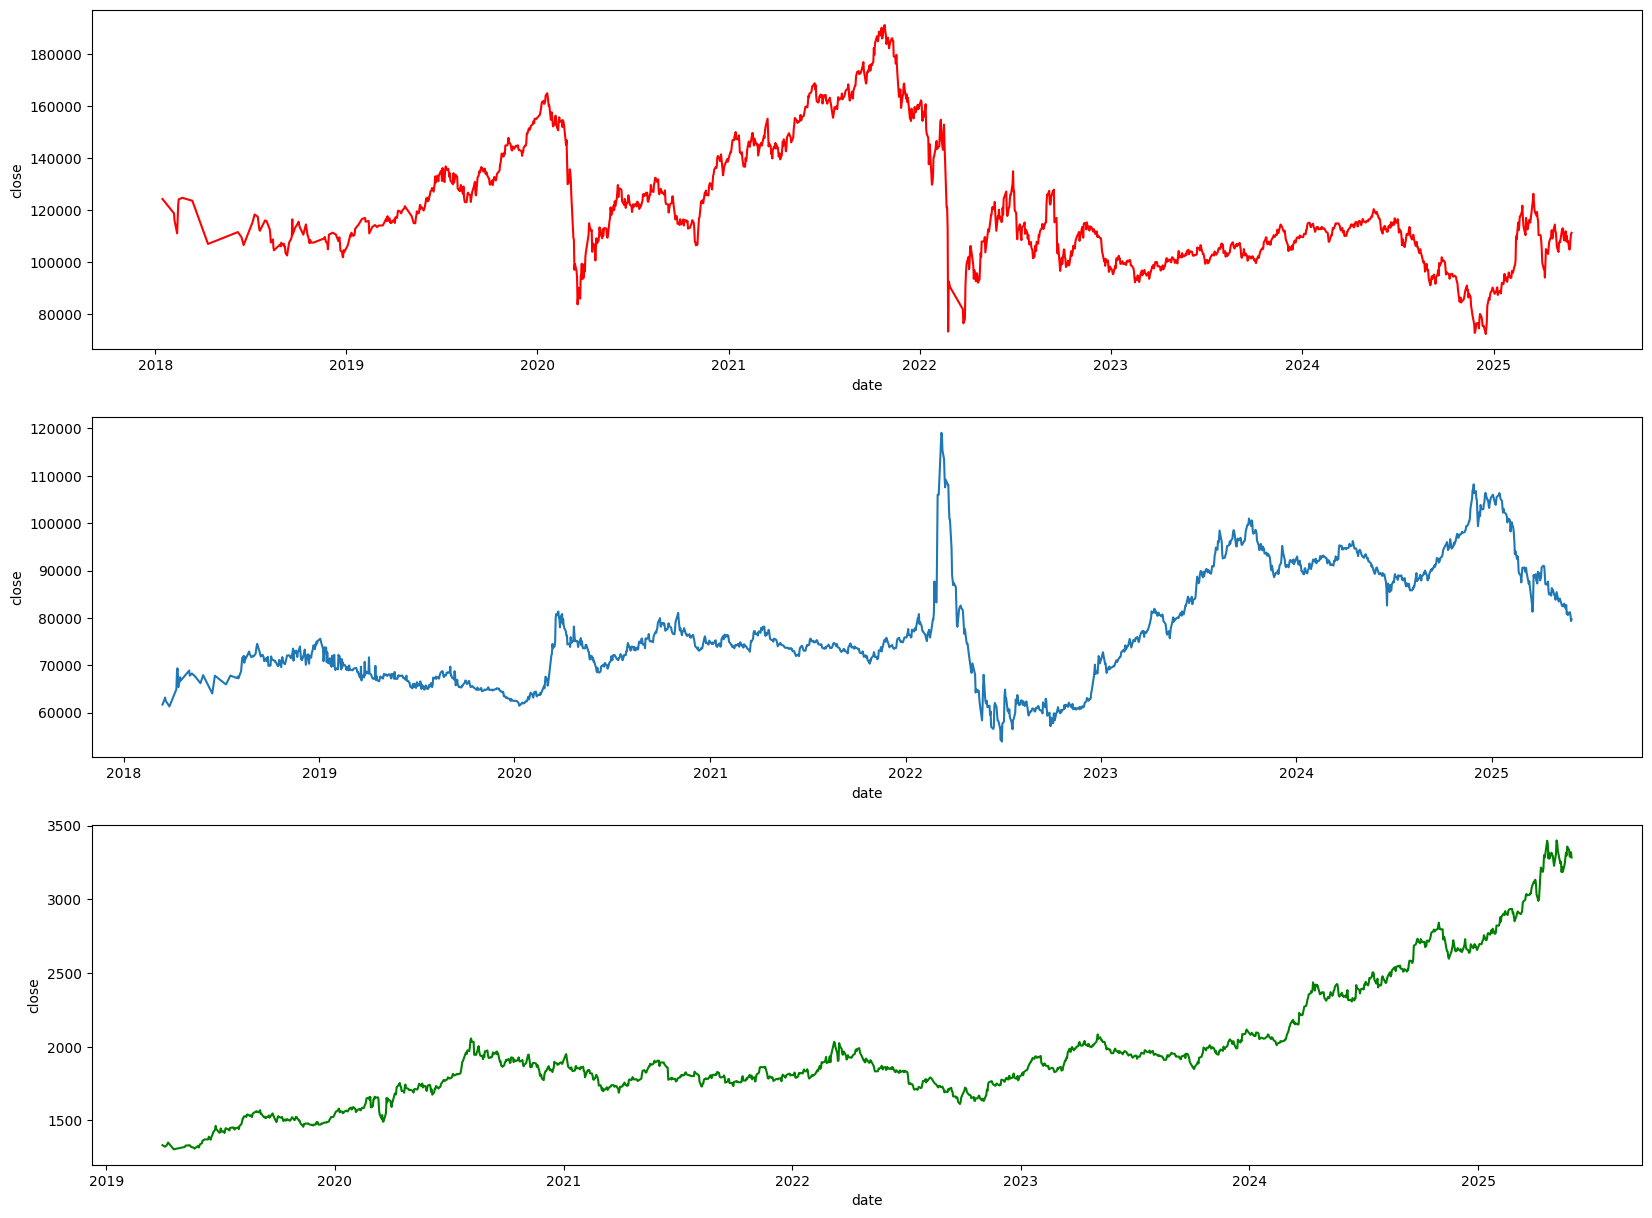

In [116]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
sns.lineplot(rts_continuos, ax=ax[0], color='red')
sns.lineplot(si_continuos, ax=ax[1])
sns.lineplot(gold_continuos, ax=ax[2], color='green')

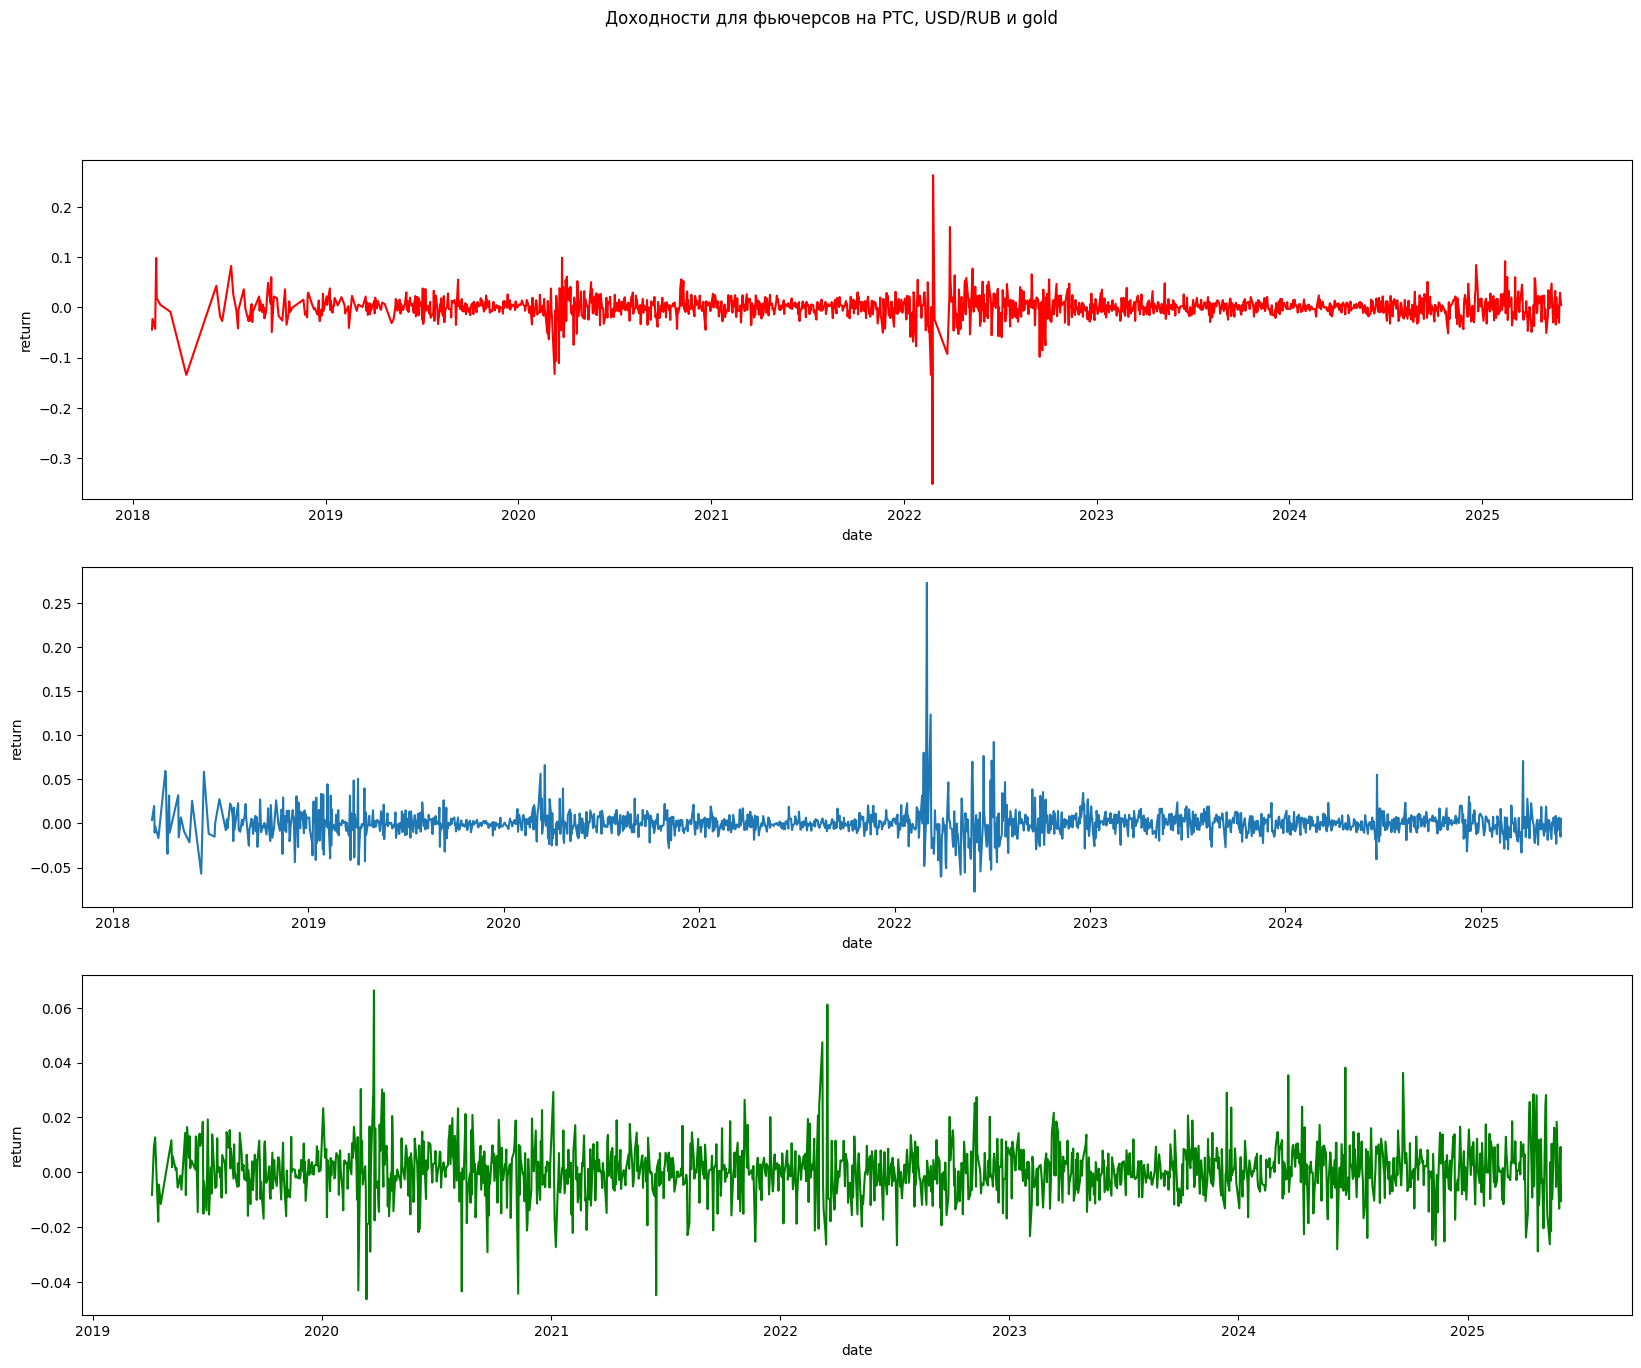

In [117]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
sns.lineplot(rts_continuos.pct_change(), ax=ax[0], color='red')
sns.lineplot(si_continuos.pct_change(), ax=ax[1])
sns.lineplot(gold_continuos.pct_change(), ax=ax[2], color='green')
fig.suptitle('Доходности для фьючерсов на РТС, USD/RUB и gold')
for axis in ax:
    axis.set_ylabel('return')

#### Посчитаем рисковые метрики для наших фьючерсов 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def compute_risk_metrics(series):
    Return = series.pct_change()
    returns = Return.dropna()

    daily_vol = returns.std()
    annual_vol = daily_vol * np.sqrt(252) #получаем годовую волатильность умножая на кол-во рабочих дней в году 

    max_1d_loss = abs(returns.min()) * 100 #минимальный дневной ретерн 

    def max_nday_loss(price_series, window_days): #используем окно 
        ret_N = price_series.pct_change(periods=window_days) #процентное изменение в окне размера window_days (в нашем случае будет 10 и 20)

        ret_N = ret_N.dropna()

        return abs(ret_N.min()) * 100 #так же берем минимальное значение 

    max_10d_loss = max_nday_loss(series, 10)
    max_20d_loss = max_nday_loss(series, 20)

    return {
        'annual_vol': annual_vol * 100,       
        'max_1d_loss': max_1d_loss,           
        'max_10d_loss': max_10d_loss,         
        'max_20d_loss': max_20d_loss          
    }


metrics_ri = compute_risk_metrics(rts_continuos)
metrics_si = compute_risk_metrics(si_continuos)
metrics_gold = compute_risk_metrics(gold_continuos)

print("Фьючерс на индекс РТС:\n")
for k, v in metrics_ri.items():
    print(f"{k}: {v:.2f}%")
print("\nФьючерс USD/RUB:\n")
for k, v in metrics_si.items():
    print(f"{k}: {v:.2f}%")
print("\nФьючерс Золото:\n")
for k, v in metrics_gold.items():
    print(f"{k}: {v:.2f}%")

Фьючерс на индекс РТС:

annual_vol: 37.55%
max_1d_loss: 35.15%
max_10d_loss: 52.64%
max_20d_loss: 47.83%

Фьючерс USD/RUB:

annual_vol: 24.32%
max_1d_loss: 7.72%
max_10d_loss: 22.50%
max_20d_loss: 33.83%

Фьючерс Золото:

annual_vol: 15.20%
max_1d_loss: 4.64%
max_10d_loss: 9.39%
max_20d_loss: 7.48%


#### Два фонда, один с лимитом, второй с var подходом

In [127]:
assets = {
    'RTS' : rts,
    'Si'  : si,
    'Gold': gold,
}

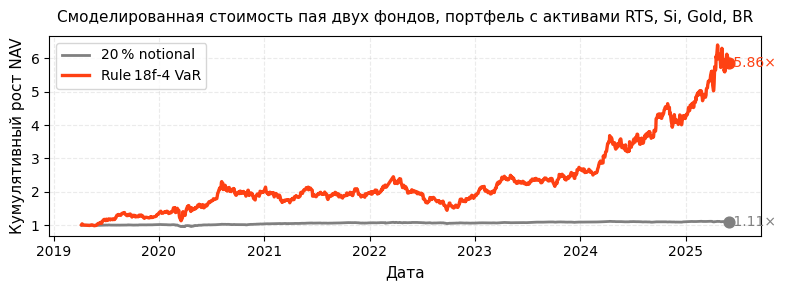

          Gross Notional  Ann Return  Ann Vol
RU limit          0.2000      0.0178   0.0302
US VaR            2.4061      0.3429   0.3017


In [135]:
from scipy.stats import norm

def CompareTwoFunds(assets):        

    prices = pd.concat({k: load_nearest_contract(v) for k, v in assets.items()}, axis=1).dropna() #конкатим, будем работать с этими тремя фьючерсами 
    rets   = prices.pct_change().dropna()  # получаем ~доходности      

    Z = norm.ppf(0.99)            # 99-%-й перцентиль (односторонний)  
    H = 20              # 20-дневный горизонт как SEC и UCITS 

    def var_20d_99(weights):
        port = rets.dot(weights)  #дневная доходность портфеля
        return Z * port.std() * np.sqrt(H)  #грубое предположение о независимости, диперсия суммы = сумма дисперсий + считаем матож = нулю поэтому для ДИ получаем только z sigma sqrt(20)

    w_drp = np.array([1/len(assets) for i in range(len(assets))])  #В Штатах фонд сам выбирает DRP — портфель без деривативов, но положим просто одинаковые веса.
    VaR_DRP = var_20d_99(w_drp)  #var референсного портфеля 

    w_ru = np.array([0.2 / len(assets)]*len(assets))  # русский фонд, открываем лонги, веса суммируются в 20-% 

    raw = rets.mean().values / rets.var().values # у кого доходность выше на единицу дисперсии, тому и бОльший вес 
    raw /= np.abs(raw).sum()                # нормируем

    VaR_raw = var_20d_99(raw) #var "американского" фонда 

    # SEC-Rule коэффициенты 
    scale_abs = 0.20 / VaR_raw              # Absolute ≤ 20 % NAV, предположим, что PnL распределение не меняется а просто сдвигается при плече, так же квантиль q(kX) = kq(X), поэтому макс плечо \\
                                            #выражается  Var(kw) <= 0.20 => k_max = 0.20/ Var(w)
    scale_rel = 2.00 * VaR_DRP / VaR_raw    # Relative ≤ 200 % DRP: Var(kw) <= 2 Var_DRP => k_max = 2 * Var_DRP / Var(w)
    scale     = min(scale_abs, scale_rel) # фонд должен удовлетворять обоим требованиям 

    w_us = raw * scale                      # финальные веса США-фонда, умножаем вектор весов на найденный скейл, то есть движемся до максимально допустимого var 

    nav_ru = (1 + rets.dot(w_ru)).cumprod() #rets.dot(w_ru) - дневная доходность фонда, (1 + r_t) дневной прирост доходности пая и берем коммулятивное произведение, получая траектории доходности 
    nav_us = (1 + rets.dot(w_us)).cumprod() #то же самое для штатов но с вар подходом, а не с лимитами 


    plt.figure(figsize=(8,3))
    plt.plot(nav_ru, label='20 % notional', color='gray', linewidth=2.0)
    plt.plot(nav_us, label='Rule 18f‑4 VaR', color='#FE4113', linewidth=2.4)

    plt.title(f'Смоделированная стоимость пая двух фондов, портфель с активами {', '.join(list(assets.keys())[i] for i in range(len(assets)))}', fontsize=11, pad=10)
    plt.xlabel('Дата', fontsize=11)
    plt.ylabel('Кумулятивный рост NAV', fontsize=11)
    plt.grid(alpha=0.25, linestyle='--')

    for series, label, c in [(nav_ru,'20 % notional','gray'), (nav_us,'VaR','#FE4113')]:
        x, y = series.index[-1], series.iloc[-1]
        plt.scatter(x, y, color=c, s=60, zorder=5)
        plt.text(x, y, f' {y:.2f}×', va='center', ha='left', color=c, fontsize=10)

    plt.legend(frameon=True)
    plt.tight_layout()
    plt.show()

    tbl = pd.DataFrame({
        'Gross Notional': [np.sum(np.abs(w_ru)), np.sum(np.abs(w_us))],
        'Ann Return':          [rets.dot(w_ru).mean()*252,
                                rets.dot(w_us).mean()*252],
        'Ann Vol':             [rets.dot(w_ru).std()*np.sqrt(252),
                                rets.dot(w_us).std()*np.sqrt(252)],
    }, index=['RU limit', 'US VaR'])
    print(tbl.round(4))
CompareTwoFunds(assets)
             

Рассмотрим еще фьючерс на нефть и выведем все результаты всех возможных комбинаций портфелей. распределенных по соответствующим фьючерсам 

Text(0.5, 0.98, 'Динамика котировок фьючерса на нефть')

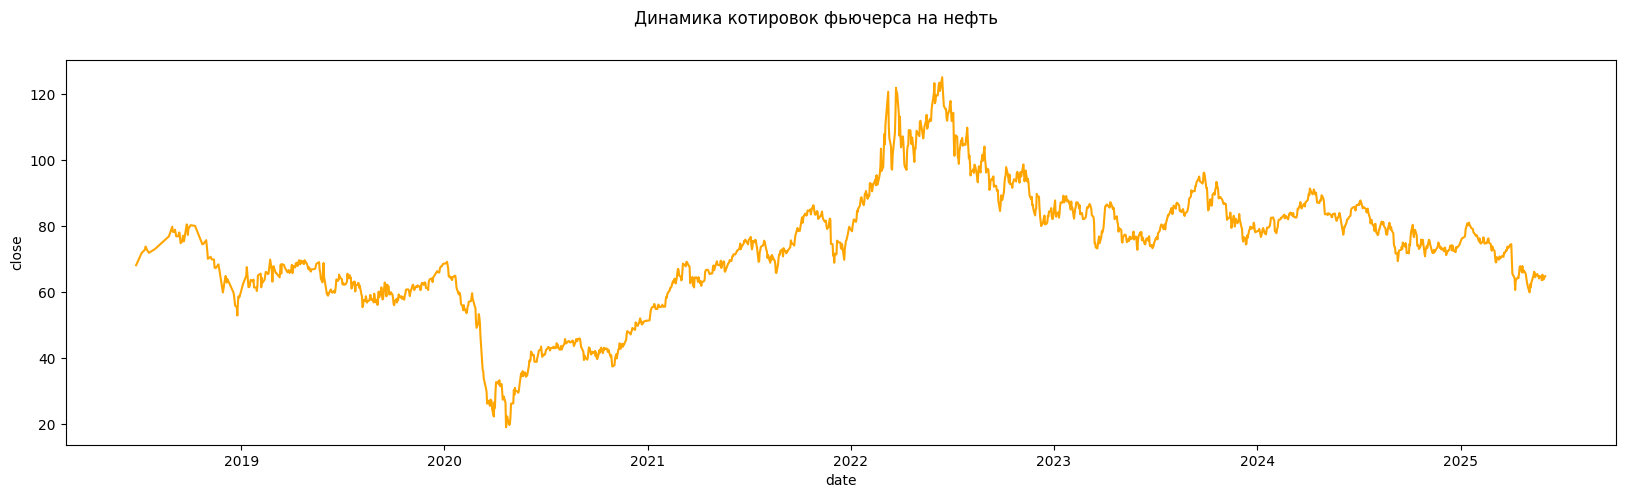

In [130]:
br = pd.read_excel('BR.xlsx')
br_continuos = load_nearest_contract(br)
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.lineplot(br_continuos, ax=ax, color='orange')
fig.suptitle('Динамика котировок фьючерса на нефть')

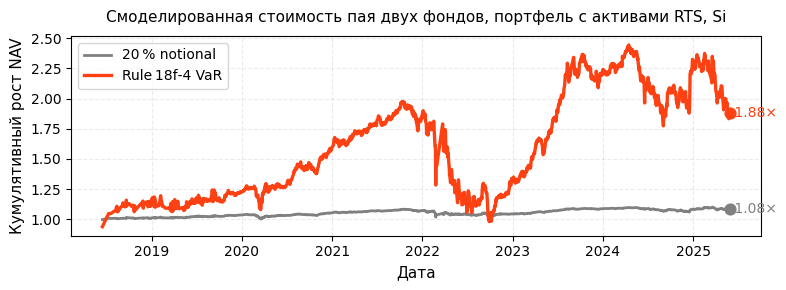

          Gross Notional  Ann Return  Ann Vol
RU limit          0.2000      0.0128   0.0299
US VaR            2.3738      0.1433   0.2986


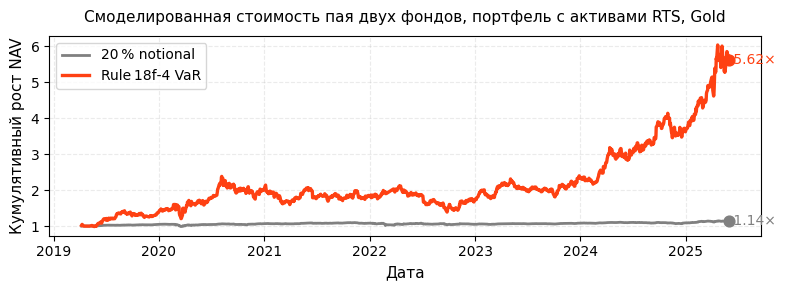

          Gross Notional  Ann Return  Ann Vol
RU limit          0.2000      0.0227   0.0414
US VaR            2.1299      0.3361   0.3052


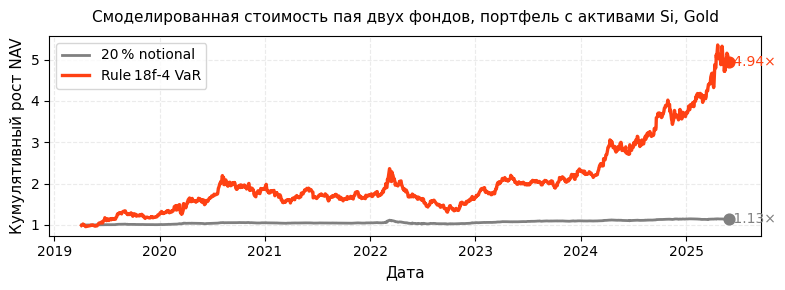

          Gross Notional  Ann Return  Ann Vol
RU limit          0.2000      0.0212   0.0282
US VaR            2.0563      0.3035   0.2821


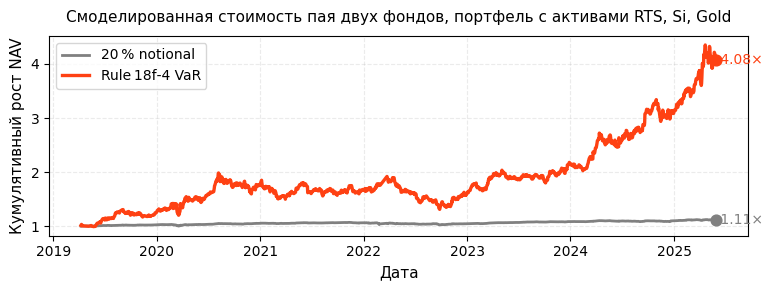

          Gross Notional  Ann Return  Ann Vol
RU limit          0.2000      0.0184   0.0228
US VaR            1.8009      0.2618   0.2275


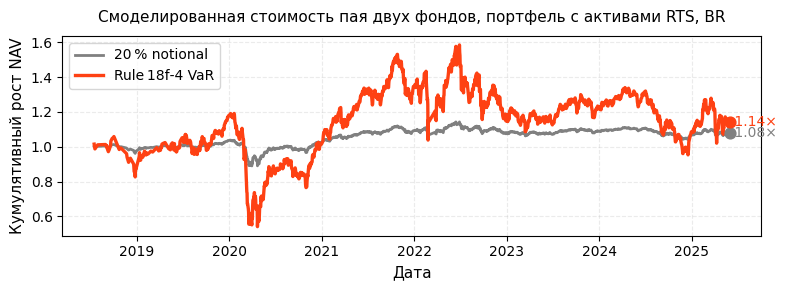

          Gross Notional  Ann Return  Ann Vol
RU limit          0.2000      0.0141   0.0626
US VaR            0.9831      0.0689   0.3052


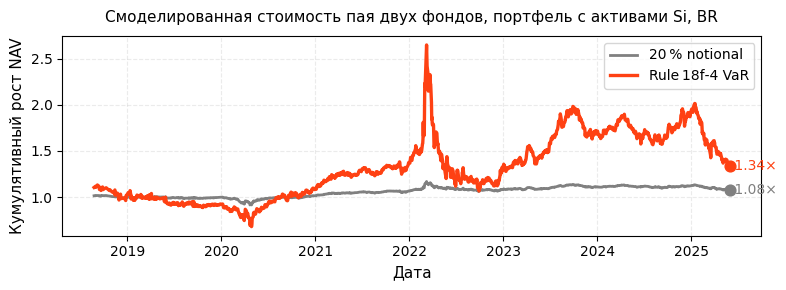

          Gross Notional  Ann Return  Ann Vol
RU limit           0.200      0.0125   0.0466
US VaR             1.525      0.0895   0.3052


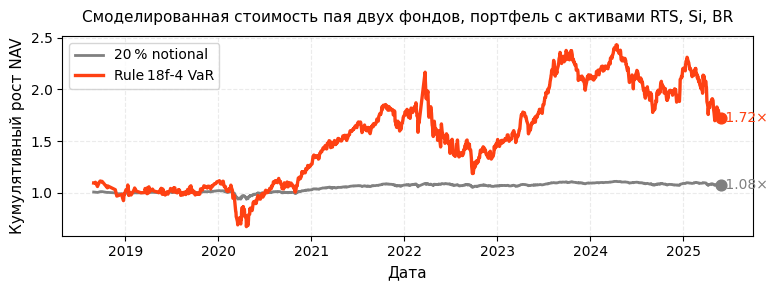

          Gross Notional  Ann Return  Ann Vol
RU limit          0.2000       0.013   0.0379
US VaR            2.1926       0.133   0.3052


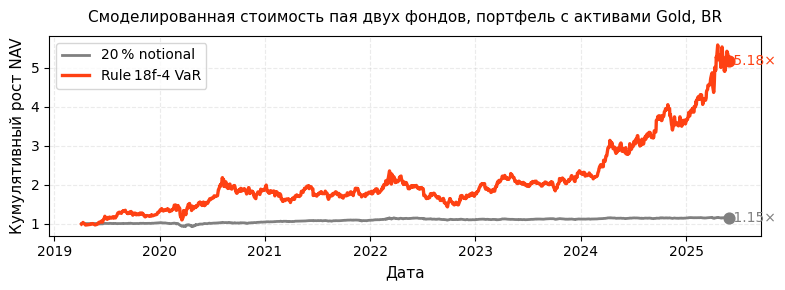

          Gross Notional  Ann Return  Ann Vol
RU limit          0.2000      0.0241   0.0466
US VaR            2.0469      0.3190   0.3052


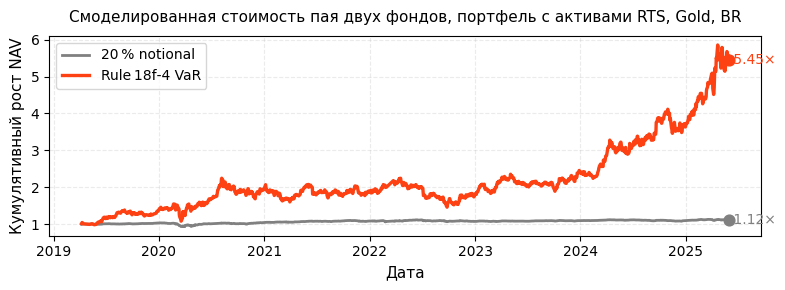

          Gross Notional  Ann Return  Ann Vol
RU limit          0.2000      0.0205   0.0441
US VaR            2.1536      0.3318   0.3052


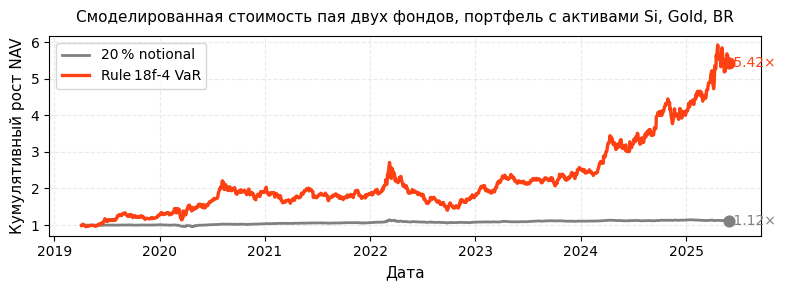

          Gross Notional  Ann Return  Ann Vol
RU limit           0.200      0.0195   0.0335
US VaR             2.264      0.3263   0.3052


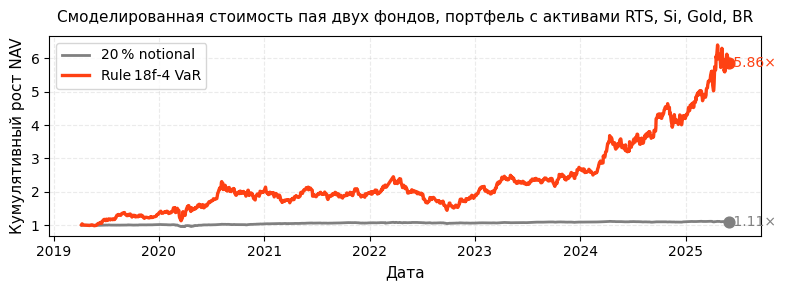

          Gross Notional  Ann Return  Ann Vol
RU limit          0.2000      0.0178   0.0302
US VaR            2.4061      0.3429   0.3017


In [131]:
assets = {
    'RTS' : rts,
    'Si'  : si,
    'Gold': gold,
    'BR': br
}


assets_list_keys = list(assets.keys())
assets_list_values = list(assets.values())

#перебираем все возможные пдодмножества активов, рассмотрим портфели, где кол-во активов >= 2 
for i in range(1, 2 ** len(assets_list_keys)):
    portolio = {assets_list_keys[j]: assets_list_values[j]  for j in range(len(assets_list_keys)) if (i & (1 << j))}
    if len(portolio) > 1:
        CompareTwoFunds(portolio)

#### Почему внедряем 

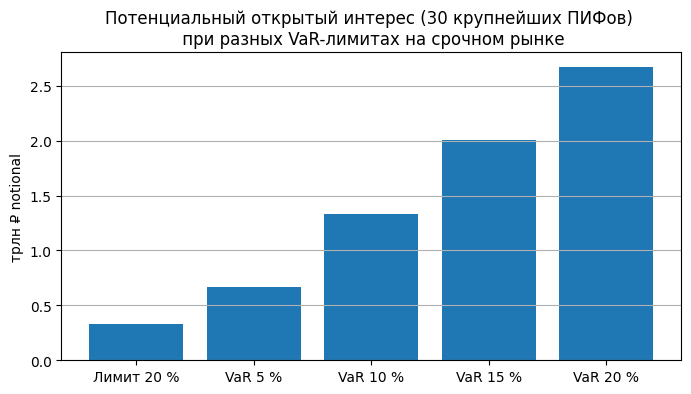

,Сценарий,"Откр. интерес, трлн ₽"
0,Лимит 20 %,0.33
1,VaR 5 %,0.67
2,VaR 10 %,1.34
3,VaR 15 %,2.00
4,VaR 20 %,2.67


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nav_bln = np.array([
    355.23, 266.86, 190.56, 144.52, 120.53, 79.07, 51.67, 49.18, 32.93, 30.18,
    27.94, 27.27, 25.12, 22.39, 21.62, 21.37, 18.30, 18.25, 16.53, 16.26,
    15.97, 15.37, 14.43, 14.25, 12.41, 11.85, 11.81, 11.81, 11.79, 11.61
]) # NAV 30 крупнейших ПИФов, млрд ₽
nav = nav_bln * 1e9  # NAV в рублях

notional_ru = 0.20 * nav # Потенциальный notional при лимите 20 % (действующие правила)
total_ru = notional_ru.sum() / 1e12  # в трлн ₽

sigma_eff = 0.012 #эмпирическая дневная волатильность хорошо диверсифицированного портфеля 1.2 %
VaR_targets = [0.05, 0.10, 0.15, 0.20]   # 5 %, 10 %, 15 %, 20 % NAV

totals_us = []
leverage_list = []

for target in VaR_targets:
    leverage = target / (Z * sigma_eff * np.sqrt(H))   # максимальное плечо, Var(k) = k z sigma sqrt(H) <= target => k_max = target / (z * sigma * sqrt(H)), покажем на примере абсолютного Var 
    leverage_list.append(leverage) 
    totals_us.append((leverage * nav).sum() / 1e12)    # трлн ₽ notional

labels = ['Лимит 20 %'] + [f'VaR {int(t*100)} %' for t in VaR_targets]
values = [total_ru] + totals_us

plt.figure(figsize=(8,4))
plt.bar(labels, values)
plt.ylabel('трлн ₽ notional')
plt.title('Потенциальный открытый интерес (30 крупнейших ПИФов) \n при разных VaR-лимитах на срочном рынке')
plt.grid(axis='y')
plt.show()

summary = pd.DataFrame({
    'Сценарий': ['Лимит 20 %'] + [f'VaR {int(t*100)} %' for t in VaR_targets],
    'Откр. интерес, трлн ₽': [round(total_ru,2)] + [round(t,2) for t in totals_us]
})

summary.round(2)
